In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# one time Run
df.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'},inplace=True);

In [6]:
df.head(2)

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81


In [8]:
np.sum(df.isnull())

CustomerID       0
Genre            0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [13]:
df.shape

(200, 5)

In [14]:
X=df.iloc[:,3:5].values

In [16]:
from sklearn.cluster import KMeans
wcss = [] # python list
# finding the ideal number of K (clusters)


for i in range(1,11): # considering 1 to 10 clusters
    km=KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=9,random_state=10*i)
#    n_clusters = no of clusters
#    init = how the centroids are initialized
#    n_init = number of times the centroids are randomly initialized for each/every number of clusters
    km.fit(X)
    wcss.append(km.inertia_)
    

In [17]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37271.8862365895,
 30241.34361793659,
 25030.383098520328,
 21826.936303231654,
 19646.482018947238]

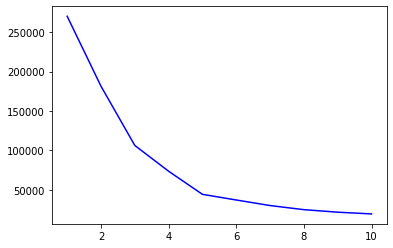

In [19]:
plt.plot(range(1,11),wcss,color='blue')

In [20]:
# Ideal number of clusters is 5

In [21]:
# Building the actual model with 5 clusters
km=KMeans(n_clusters=5,init='k-means++',n_init=9)
y_means = km.fit_predict(X)

In [24]:
y_means #there are 5 clusters 0 to 4 and each data point belong to certain cluster

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

Text(0, 0.5, 'Spending Score')

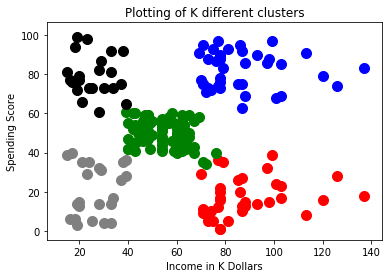

In [28]:
#plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s = 100, c = 'red', label='cluster 1')
plt.scatter(X[y_means==0,0],X[y_means==0,1], s=100, c='red', label = 'cluster 1')
plt.scatter(X[y_means==1,0],X[y_means==1,1], s=100, c='blue', label = 'cluster 2')
plt.scatter(X[y_means==2,0],X[y_means==2,1], s=100, c='green', label = 'cluster 3')
plt.scatter(X[y_means==3,0],X[y_means==3,1], s=100, c='grey', label = 'cluster 4')
plt.scatter(X[y_means==4,0],X[y_means==4,1], s=100, c='black', label = 'cluster 5')

plt.title("Plotting of K different clusters")
plt.xlabel('Income in K Dollars')
plt.ylabel("Spending Score")